### Data Quality Assesment and determination of potential customers using RFM Analysis

Three datasets are provided by a medium size bikes & cycling accessories organisation, namely, Customer Demographics, Customer Address and Transactions. Customer Demographics dataset contains the information about basic demographics of the customer. Customer Address dataset contains the information regarding the address and location of the customer and the Transactions dataset contains the information regarding the past transactions done by these customers with the company.

It is required to perform data quality assessment on the three datasets and rectify the issues. Also, it is required to perform the Exploratory Data Analysis on the data and determine the high value and potential customers for the organisation for optimizing the marketting strategy. This would help the marketting team of the organization to optimise resource allocation for targeted marketing by focusing on high value customers.

In [1]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
from datetime import datetime as dt
import dateutil.parser
style.use('ggplot')
%matplotlib inline

### EDA & Data Cleaning for Customer Demographics Dataset
##### Analysis of the given dataset and determination and removal of quality issues

In [2]:
#reading the Customer Dempographics Dataset
df1=pd.read_csv('Customer_Demographics.csv')
df1.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
0,1,Laraine,Medendorp,F,93,12/10/1953,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11.0
1,2,Eli,Bockman,Male,81,16/12/1980,Administrative Officer,Financial Services,Mass Customer,N,<script>alert('hi')</script>,Yes,16.0
2,3,Arlin,Dearle,Male,61,20/01/1954,Recruiting Manager,Property,Mass Customer,N,01-Feb,Yes,15.0
3,4,Talbot,NaN,Male,33,03/10/1961,NaN,IT,Mass Customer,N,() { _; } >_[$($())] { touch /tmp/blns.shellsh...,No,7.0
4,5,Sheila-kathryn,Calton,Female,56,13/05/1977,Senior Editor,NaN,Affluent Customer,N,NIL,Yes,8.0


In [3]:
#dropping default column which appears insignificant
df1=df1.drop('default',axis=1)
df1.shape

(4000, 12)

In [4]:
print(df1.shape,df1.size)

(4000, 12) 48000


In [5]:
print(df1.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 12 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   customer_id                          4000 non-null   int64  
 1   first_name                           4000 non-null   object 
 2   last_name                            3875 non-null   object 
 3   gender                               4000 non-null   object 
 4   past_3_years_bike_related_purchases  4000 non-null   int64  
 5   DOB                                  3913 non-null   object 
 6   job_title                            3494 non-null   object 
 7   job_industry_category                3344 non-null   object 
 8   wealth_segment                       4000 non-null   object 
 9   deceased_indicator                   4000 non-null   object 
 10  owns_car                             4000 non-null   object 
 11  tenure                        

In [6]:
#check for columns with missing values
df1.isnull().any()

customer_id                            False
first_name                             False
last_name                               True
gender                                 False
past_3_years_bike_related_purchases    False
DOB                                     True
job_title                               True
job_industry_category                   True
wealth_segment                         False
deceased_indicator                     False
owns_car                               False
tenure                                  True
dtype: bool

In [7]:
#Determining the number of missing values
df1.isnull().sum()

customer_id                              0
first_name                               0
last_name                              125
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                     87
job_title                              506
job_industry_category                  656
wealth_segment                           0
deceased_indicator                       0
owns_car                                 0
tenure                                  87
dtype: int64

In [8]:
#Dropping the null values
df1=df1.dropna()

In [9]:
df1.isnull().sum()

customer_id                            0
first_name                             0
last_name                              0
gender                                 0
past_3_years_bike_related_purchases    0
DOB                                    0
job_title                              0
job_industry_category                  0
wealth_segment                         0
deceased_indicator                     0
owns_car                               0
tenure                                 0
dtype: int64

In [10]:
df1.shape

(2780, 12)

In [11]:
#checking the distinct gender entries
df1['gender'].value_counts()

Female    1444
Male      1333
Femal        1
F            1
U            1
Name: gender, dtype: int64

In [12]:
#Resolving duplicate gender entries
map_gender={'F':'Female','Femal':'Female','Female':'Female','Male':'Male','U':'U'}
df1['gender']=df1['gender'].map(map_gender)
df1['gender'].value_counts()

Female    1446
Male      1333
U            1
Name: gender, dtype: int64

In [13]:
#Determining the age of the customers
df1['DOB']=df1['DOB'].apply(lambda x:dateutil.parser.parse(x).strftime("%Y-%m-%d"))
df1['DOB']=df1['DOB'].apply(lambda x:np.datetime64(x))
df1['Age']=2020-pd.DatetimeIndex(df1['DOB']).year
df1.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,Age
0,1,Laraine,Medendorp,Female,93,1953-12-10,Executive Secretary,Health,Mass Customer,N,Yes,11.0,67
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,Yes,16.0,40
2,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,Yes,15.0,66
8,9,Mala,Lind,Female,97,1973-10-03,Business Systems Development Analyst,Argiculture,Affluent Customer,N,Yes,8.0,47
9,10,Fiorenze,Birdall,Female,49,1988-11-10,Senior Quality Engineer,Financial Services,Mass Customer,N,Yes,20.0,32


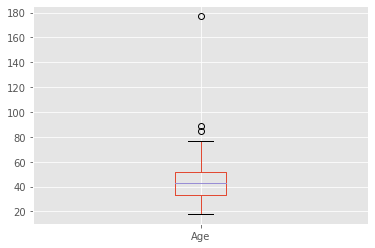

In [14]:
#Checking for outliers and possible faulty DOB entry
df1.boxplot(['Age'])

In [15]:
#Removing Outliers via age column
df1=df1.drop(df1[df1['Age']>100].index)
df1.shape

(2779, 13)

In [16]:
#Checking for unique entries in job column
df1['job_title'].unique()

array(['Executive Secretary', 'Administrative Officer',
       'Recruiting Manager', 'Business Systems Development Analyst',
       'Senior Quality Engineer', 'Nuclear Power Engineer', 'Developer I',
       'Account Executive', 'Junior Executive', 'Geological Engineer',
       'Project Manager', 'Safety Technician I', 'Research Assistant I',
       'Accounting Assistant III', 'Editor', 'Research Nurse',
       'Safety Technician III', 'Staff Accountant III', 'Legal Assistant',
       'Information Systems Manager', 'Social Worker',
       'Senior Cost Accountant', 'Assistant Media Planner',
       'Payment Adjustment Coordinator', 'Food Chemist', 'Accountant III',
       'Director of Sales', 'Senior Financial Analyst',
       'Registered Nurse', 'Computer Systems Analyst II',
       'Software Test Engineer II', 'Sales Associate', 'Paralegal',
       'VP Sales', 'Office Assistant III', 'Help Desk Operator',
       'Research Associate', 'VP Product Management', 'Statistician II',
       '

In [17]:
#checking for unique entries in job_industry_category column
df1['job_industry_category'].value_counts()

Manufacturing         670
Financial Services    661
Health                529
Retail                297
Property              229
IT                    123
Entertainment         116
Argiculture            97
Telecommunications     57
Name: job_industry_category, dtype: int64

In [18]:
#checking unique wealth segments
df1['wealth_segment'].value_counts()

Mass Customer        1384
High Net Worth        710
Affluent Customer     685
Name: wealth_segment, dtype: int64

In [19]:
#checking the customers that are now deceased
df1['deceased_indicator'].value_counts()

N    2777
Y       2
Name: deceased_indicator, dtype: int64

In [20]:
#Dropping the deceased customers that are now insignificant as potential customers
df1=df1.drop(df1[df1['deceased_indicator']=='Y'].index)
df1.shape

(2777, 13)

In [21]:
#checking for values of owns car column
df1['owns_car'].value_counts()

Yes    1419
No     1358
Name: owns_car, dtype: int64

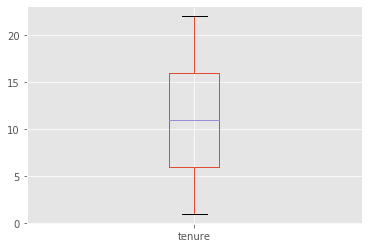

In [22]:
#inspecting the distribution of tenure
df1.boxplot(['tenure'])

### EDA and Data Cleaning for Customer Address Dataset
##### Analysis of the given datasets and determination and removal of quality issues

In [23]:
#Reading the Customer Address dataset
df2=pd.read_csv("Customer Address.csv")
df2.head()

,customer_id,address,postcode,state,country,property_valuation
0,1,060 Morning Avenue,2016,New South Wales,Australia,10
1,2,6 Meadow Vale Court,2153,New South Wales,Australia,10
2,4,0 Holy Cross Court,4211,QLD,Australia,9
3,5,17979 Del Mar Point,2448,New South Wales,Australia,4
4,6,9 Oakridge Court,3216,VIC,Australia,9


In [24]:
print(df2.shape,df2.size)

(3999, 6) 23994


In [25]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   customer_id         3999 non-null   int64 
 1   address             3999 non-null   object
 2   postcode            3999 non-null   int64 
 3   state               3999 non-null   object
 4   country             3999 non-null   object
 5   property_valuation  3999 non-null   int64 
dtypes: int64(3), object(3)
memory usage: 187.6+ KB


In [26]:
#check for null values
df2.isnull().sum()

customer_id           0
address               0
postcode              0
state                 0
country               0
property_valuation    0
dtype: int64

In [27]:
#checking post code values
df2['postcode'].value_counts()

2170    31
2155    30
2145    30
2153    29
2770    26
        ..
4552     1
4555     1
2485     1
3580     1
4421     1
Name: postcode, Length: 873, dtype: int64

In [28]:
#checking state values
df2['state'].value_counts()

NSW                2054
VIC                 939
QLD                 838
New South Wales      86
Victoria             82
Name: state, dtype: int64

In [29]:
#Resolving Duplicate State names
map_state={'New South Wales':'NSW','NSW':'NSW','Victoria':'VIC','VIC':'VIC','QLD':'QLD'}
df2['state']=df2['state'].map(map_state)
df2['state'].value_counts()

NSW    2140
VIC    1021
QLD     838
Name: state, dtype: int64

In [30]:
#checking country values
df2['country'].value_counts()

Australia    3999
Name: country, dtype: int64

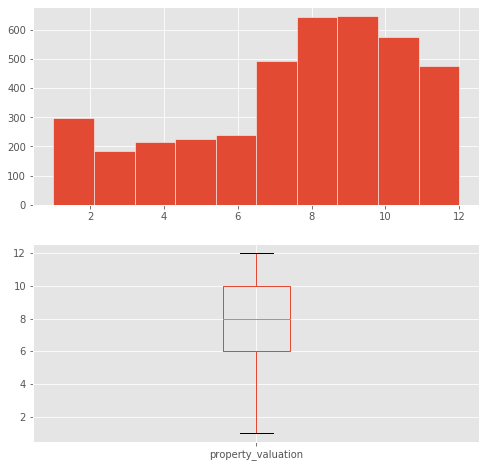

In [31]:
#checking distribution of property valuation
plt.figure(figsize=(8,8))
plt.subplot(2,1,1)
plt.hist(df2['property_valuation'],ec='white')
plt.subplot(2,1,2)
df2.boxplot(['property_valuation'])
plt.show()

### EDA and Data Cleaning of Transactions Dataset
##### Analysis of the given datasets and determination and removal of quality issues

In [32]:
#Reading the Transactions dataset
df3=pd.read_csv('Transactions.csv')
df3.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,2,2950,25/02/2017,False,Approved,Solex,Standard,medium,medium,71.49,$53.62,02/12/2012
1,2,3,3120,21/05/2017,True,Approved,Trek Bicycles,Standard,medium,large,2091.47,$388.92,03/03/2014
2,3,37,402,16/10/2017,False,Approved,OHM Cycles,Standard,low,medium,1793.43,$248.82,20/07/1999
3,4,88,3135,31/08/2017,False,Approved,Norco Bicycles,Standard,medium,medium,1198.46,$381.10,16/12/1998
4,5,78,787,01/10/2017,True,Approved,Giant Bicycles,Standard,medium,large,1765.30,$709.48,10/08/2015


In [33]:
print(df3.shape,df3.size)

(20000, 13) 260000


In [34]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   transaction_id           20000 non-null  int64  
 1   product_id               20000 non-null  int64  
 2   customer_id              20000 non-null  int64  
 3   transaction_date         20000 non-null  object 
 4   online_order             19640 non-null  object 
 5   order_status             20000 non-null  object 
 6   brand                    19803 non-null  object 
 7   product_line             19803 non-null  object 
 8   product_class            19803 non-null  object 
 9   product_size             19803 non-null  object 
 10  list_price               20000 non-null  float64
 11  standard_cost            19803 non-null  object 
 12  product_first_sold_date  19803 non-null  object 
dtypes: float64(1), int64(3), object(9)
memory usage: 2.0+ MB


In [35]:
#check for null values
df3.isnull().sum()

transaction_id               0
product_id                   0
customer_id                  0
transaction_date             0
online_order               360
order_status                 0
brand                      197
product_line               197
product_class              197
product_size               197
list_price                   0
standard_cost              197
product_first_sold_date    197
dtype: int64

In [36]:
#dropping the null values
df3=df3.dropna()
df3.shape

(19445, 13)

In [37]:
df3.isnull().sum()

transaction_id             0
product_id                 0
customer_id                0
transaction_date           0
online_order               0
order_status               0
brand                      0
product_line               0
product_class              0
product_size               0
list_price                 0
standard_cost              0
product_first_sold_date    0
dtype: int64

In [38]:
#Changing Date to common format and determining recency
df3['transaction_date']=df3['transaction_date'].apply(lambda x:dateutil.parser.parse(x).strftime("%Y-%m-%d"))
df3['transaction_date']=df3['transaction_date'].apply(lambda x:np.datetime64(x))
recent_date=np.datetime64(df3['transaction_date'].max())
df3['Recency']=df3['transaction_date'].apply(lambda x: (recent_date-x).days)
df3.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,Recency
0,1,2,2950,2017-02-25,False,Approved,Solex,Standard,medium,medium,71.49,$53.62,02/12/2012,308
1,2,3,3120,2017-05-21,True,Approved,Trek Bicycles,Standard,medium,large,2091.47,$388.92,03/03/2014,223
2,3,37,402,2017-10-16,False,Approved,OHM Cycles,Standard,low,medium,1793.43,$248.82,20/07/1999,75
3,4,88,3135,2017-08-31,False,Approved,Norco Bicycles,Standard,medium,medium,1198.46,$381.10,16/12/1998,121
4,5,78,787,2017-01-10,True,Approved,Giant Bicycles,Standard,medium,large,1765.30,$709.48,10/08/2015,354


In [39]:
#checking the values of online order
df3['online_order'].value_counts()

True     9739
False    9706
Name: online_order, dtype: int64

In [40]:
#checking the values of order status
df3['order_status'].value_counts()

Approved     19273
Cancelled      172
Name: order_status, dtype: int64

In [41]:
#Checing values of product class, product size and product line
print(df3['brand'].value_counts(),df3['product_class'].value_counts(),df3['product_line'].value_counts(),
      df3['product_size'].value_counts())

Solex             4169
WeareA2B          3245
Giant Bicycles    3244
OHM Cycles        2993
Trek Bicycles     2931
Norco Bicycles    2863
Name: brand, dtype: int64 medium    13587
high       2952
low        2906
Name: product_class, dtype: int64 Standard    13920
Road         3894
Touring      1213
Mountain      418
Name: product_line, dtype: int64 medium    12767
large      3900
small      2778
Name: product_size, dtype: int64


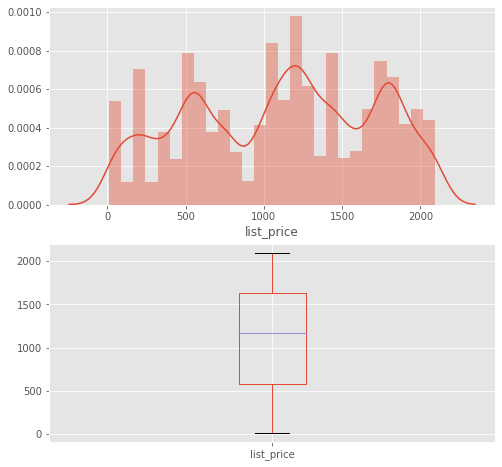

In [42]:
#checking distribution of list price
plt.figure(figsize=(8,8))
plt.subplot(2,1,1)
sns.distplot(df3['list_price'])
plt.subplot(2,1,2)
df3.boxplot(['list_price'])
plt.show()

In [43]:
#converting the standard cost from string to float
df3['standard_cost']=df3['standard_cost'].apply(lambda x:x.translate({ord('$'): None}))
df3['standard_cost']=df3['standard_cost'].apply(lambda x:x.translate({ord(','): None}))
df3['standard_cost']=df3['standard_cost'].astype(float)

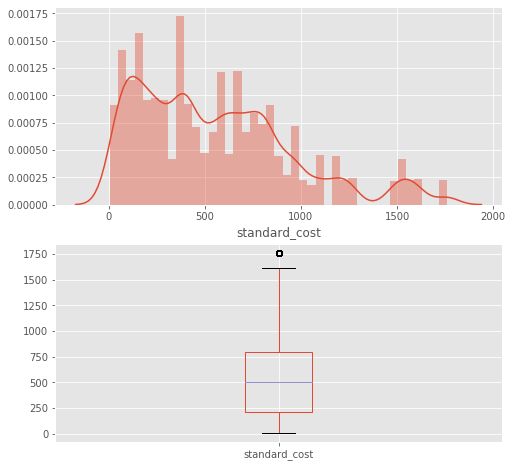

In [44]:
#checking the distribution of standard cost
plt.figure(figsize=(8,8))
plt.subplot(2,1,1)
sns.distplot(df3['standard_cost'])
plt.subplot(2,1,2)
df3.boxplot(['standard_cost'])
plt.show()

In [45]:
#creating new column Profit
df3['Profit']=df3['list_price']-df3['standard_cost']
df3.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,Recency,Profit
0,1,2,2950,2017-02-25,False,Approved,Solex,Standard,medium,medium,71.49,53.62,02/12/2012,308,17.87
1,2,3,3120,2017-05-21,True,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,03/03/2014,223,1702.55
2,3,37,402,2017-10-16,False,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,20/07/1999,75,1544.61
3,4,88,3135,2017-08-31,False,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,16/12/1998,121,817.36
4,5,78,787,2017-01-10,True,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,10/08/2015,354,1055.82


### Preparing Data for RFM Analysis

For RFM analysis, 3 factors are defined: Recency, Frequency and Monetory

Recency: Difference between the transaction date with most recent transaction (Should be as low)

Frequency: Number of times each customer bought a product (Should be high)

Monetory: Profit gained, i.e., List Price - Standard Cost (Should be high)



In [46]:
#combining the three datasets
df_merge=pd.merge(df1,df2,on='customer_id')
df_final=pd.merge(df_merge,df3,on='customer_id')
df_final.shape

(13620, 32)

In [47]:
df_final.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,...,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,Recency,Profit
0,1,Laraine,Medendorp,Female,93,1953-12-10,Executive Secretary,Health,Mass Customer,N,...,Approved,OHM Cycles,Standard,medium,medium,235.63,125.07,10/05/2005,7,110.56
1,1,Laraine,Medendorp,Female,93,1953-12-10,Executive Secretary,Health,Mass Customer,N,...,Approved,Solex,Standard,medium,medium,1577.53,826.51,19/03/2008,209,751.02
2,1,Laraine,Medendorp,Female,93,1953-12-10,Executive Secretary,Health,Mass Customer,N,...,Approved,Trek Bicycles,Road,low,small,1720.70,1531.42,21/07/2003,55,189.28
3,1,Laraine,Medendorp,Female,93,1953-12-10,Executive Secretary,Health,Mass Customer,N,...,Approved,Norco Bicycles,Standard,medium,medium,360.40,270.30,09/09/2003,243,90.10
4,1,Laraine,Medendorp,Female,93,1953-12-10,Executive Secretary,Health,Mass Customer,N,...,Approved,Solex,Standard,medium,medium,71.49,53.62,09/08/2005,312,17.87


In [48]:
df_final.columns

Index(['customer_id', 'first_name', 'last_name', 'gender',
       'past_3_years_bike_related_purchases', 'DOB', 'job_title',
       'job_industry_category', 'wealth_segment', 'deceased_indicator',
       'owns_car', 'tenure', 'Age', 'address', 'postcode', 'state', 'country',
       'property_valuation', 'transaction_id', 'product_id',
       'transaction_date', 'online_order', 'order_status', 'brand',
       'product_line', 'product_class', 'product_size', 'list_price',
       'standard_cost', 'product_first_sold_date', 'Recency', 'Profit'],
      dtype='object')

In [49]:
#grouping the customer profit by customer id
cust_profit=df_final['Profit'].groupby(df_final['customer_id']).sum()
cust_profit.head()

customer_id
1     3018.09
2     2226.26
9     2353.11
12    3540.03
13    4337.38
Name: Profit, dtype: float64

In [50]:
#grouping the product by customer id
cust_freq=df_final['product_id'].groupby(df_final['customer_id']).count()
cust_freq.head()

customer_id
1     11
2      3
9      6
12     7
13     7
Name: product_id, dtype: int64

In [51]:
#grouping the Recency by customer id
cust_rec=df_final['Recency'].groupby(df_final['customer_id']).min()
cust_rec.head()

customer_id
1      7
2     54
9     78
12    28
13    43
Name: Recency, dtype: int64

### RFM Analysis

R-Score: Min to 25th Percentile:4, 25th Percentile to 50th Percentile: 3, 50th Percentile to 75th Percentile: 2, 75th Percentile to Max: 1

F-Score: Min to 25th Percentile:1, 25th Percentile to 50th Percentile: 2, 50th Percentile to 75th Percentile: 3, 75th Percentile to Max: 4

M-Score: Min to 25th Percentile:1, 25th Percentile to 50th Percentile: 2, 50th Percentile to 75th Percentile: 3, 75th Percentile to Max: 4

Combined RFM Score= R-Score + F-Score + M-Score

Categorization on basis of RFM Score: Top 25 percentile: "High Potential", 50th to 75th Percentile: "Promising", 25th to 50th Percentile: "Low Potential", Least 25 Percentile: "High Risk"




In [52]:
#Creating a new dataset for RFM Analysis
rfm_data={'Recency':cust_rec,'Frequency':cust_freq,'Profit':cust_profit}
rfm_df=pd.DataFrame(rfm_data)
rfm_df.head()

,Recency,Frequency,Profit
customer_id,,,
1,7,11,3018.09
2,54,3,2226.26
9,78,6,2353.11
12,28,7,3540.03
13,43,7,4337.38


In [53]:
#defining function to calculate R-Score
def R_Score(rec):
    if ((rec>=rfm_df['Recency'].min())&(rec<rfm_df['Recency'].quantile(0.25))):
        return 4
    elif ((rec>=rfm_df['Recency'].quantile(0.25))&(rec<rfm_df['Recency'].median())):
          return 3
    elif ((rec>=rfm_df['Recency'].median())&(rec<rfm_df['Recency'].quantile(0.75))):
           return 2
    else:
           return 1

In [54]:
#defining function to calculate F-Score
def F_Score(rec):
    if ((rec>=rfm_df['Frequency'].min())&(rec<rfm_df['Frequency'].quantile(0.25))):
        return 1
    elif ((rec>=rfm_df['Frequency'].quantile(0.25))&(rec<rfm_df['Frequency'].median())):
          return 2
    elif ((rec>=rfm_df['Frequency'].median())&(rec<rfm_df['Frequency'].quantile(0.75))):
           return 3
    else:
           return 4

In [55]:
#defining function to calculate M-Score
def M_Score(rec):
    if ((rec>=rfm_df['Profit'].min())&(rec<rfm_df['Profit'].quantile(0.25))):
        return 1
    elif ((rec>=rfm_df['Profit'].quantile(0.25))&(rec<rfm_df['Profit'].median())):
          return 2
    elif ((rec>=rfm_df['Profit'].median())&(rec<rfm_df['Profit'].quantile(0.75))):
           return 3
    else:
           return 4

In [56]:
#Calculating the scores
rfm_df['R_Score']=rfm_df['Recency'].apply(R_Score)
rfm_df['F_Score']=rfm_df['Frequency'].apply(F_Score)
rfm_df['M_Score']=rfm_df['Profit'].apply(M_Score)
rfm_df.head()

,Recency,Frequency,Profit,R_Score,F_Score,M_Score
customer_id,,,,,,
1,7,11,3018.09,4,4,3
2,54,3,2226.26,2,1,2
9,78,6,2353.11,2,3,2
12,28,7,3540.03,3,4,3
13,43,7,4337.38,3,4,4


In [57]:
#Determining the combined RFM String and RFM Score
rfm_df['RFM']=(100*rfm_df['R_Score'])+(10*rfm_df['F_Score'])+rfm_df['M_Score']
rfm_df['RFM']=rfm_df['RFM'].astype(object)
rfm_df['RFM_Score']=rfm_df['R_Score']+rfm_df['F_Score']+rfm_df['M_Score']
rfm_df.head()

,Recency,Frequency,Profit,R_Score,F_Score,M_Score,RFM,RFM_Score
customer_id,,,,,,,,
1,7,11,3018.09,4,4,3,443,11
2,54,3,2226.26,2,1,2,212,5
9,78,6,2353.11,2,3,2,232,7
12,28,7,3540.03,3,4,3,343,10
13,43,7,4337.38,3,4,4,344,11


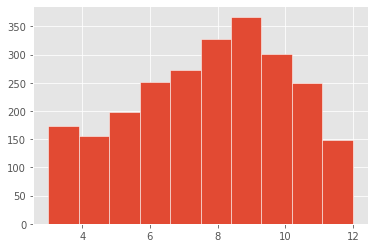

In [58]:
#Checking the distribution of RFM Score
plt.hist(rfm_df['RFM_Score'],ec='white')
plt.show()

In [59]:
#Function to determine the Customer Category based on RFM Score 
def Cust_cat(rec):
    if ((rec>=rfm_df['RFM_Score'].min())&(rec<rfm_df['RFM_Score'].quantile(0.25))):
        return "High Risk"
    elif ((rec>=rfm_df['RFM_Score'].quantile(0.25))&(rec<rfm_df['RFM_Score'].median())):
          return "Low Potential"
    elif ((rec>=rfm_df['RFM_Score'].median())&(rec<rfm_df['RFM_Score'].quantile(0.75))):
           return "Promising"
    else:
           return "High Potential"

In [60]:
#Determining the customer category
rfm_df['Category']=rfm_df['RFM_Score'].apply(Cust_cat)
rfm_df.head()

,Recency,Frequency,Profit,R_Score,F_Score,M_Score,RFM,RFM_Score,Category
customer_id,,,,,,,,,
1,7,11,3018.09,4,4,3,443,11,High Potential
2,54,3,2226.26,2,1,2,212,5,High Risk
9,78,6,2353.11,2,3,2,232,7,Low Potential
12,28,7,3540.03,3,4,3,343,10,High Potential
13,43,7,4337.38,3,4,4,344,11,High Potential


In [61]:
rfm_df['Category'].value_counts()

High Potential    699
Promising         695
High Risk         528
Low Potential     523
Name: Category, dtype: int64

In [62]:
#Setting the index of df1 and df2 as cusotmer id for concatenation
df1=df1.set_index('customer_id')
df2=df2.set_index('customer_id')

In [63]:
#Concatenating the columns
df_cust=pd.concat([df1,df2,rfm_df],axis=1)
df_cust.head()

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,...,property_valuation,Recency,Frequency,Profit,R_Score,F_Score,M_Score,RFM,RFM_Score,Category
customer_id,,,,,,,,,,,,,,,,,,,,,
1,Laraine,Medendorp,Female,93.0,1953-12-10,Executive Secretary,Health,Mass Customer,N,Yes,...,10.0,7.0,11.0,3018.09,4.0,4.0,3.0,443,11.0,High Potential
2,Eli,Bockman,Male,81.0,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,Yes,...,10.0,54.0,3.0,2226.26,2.0,1.0,2.0,212,5.0,High Risk
3,Arlin,Dearle,Male,61.0,1954-01-20,Recruiting Manager,Property,Mass Customer,N,Yes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,...,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,...,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [64]:
#Dropping the missing values from the new dataset
df_cust=df_cust.dropna()
df_cust.shape

(2445, 26)

In [65]:
df_cust=df_cust.drop(['R_Score','F_Score','M_Score','RFM'],axis=1)
df_cust.head()

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,...,address,postcode,state,country,property_valuation,Recency,Frequency,Profit,RFM_Score,Category
customer_id,,,,,,,,,,,,,,,,,,,,,
1,Laraine,Medendorp,Female,93.0,1953-12-10,Executive Secretary,Health,Mass Customer,N,Yes,...,060 Morning Avenue,2016.0,NSW,Australia,10.0,7.0,11.0,3018.09,11.0,High Potential
2,Eli,Bockman,Male,81.0,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,Yes,...,6 Meadow Vale Court,2153.0,NSW,Australia,10.0,54.0,3.0,2226.26,5.0,High Risk
9,Mala,Lind,Female,97.0,1973-10-03,Business Systems Development Analyst,Argiculture,Affluent Customer,N,Yes,...,97736 7th Trail,2023.0,NSW,Australia,12.0,78.0,6.0,2353.11,7.0,Low Potential
12,Sawyere,Flattman,Male,58.0,1994-07-21,Nuclear Power Engineer,Manufacturing,Mass Customer,N,No,...,44339 Golden Leaf Alley,4557.0,QLD,Australia,4.0,28.0,7.0,3540.03,10.0,High Potential
13,Gabriele,Norcross,Male,38.0,1955-02-15,Developer I,Financial Services,High Net Worth,N,Yes,...,2 Sutherland Street,3799.0,VIC,Australia,6.0,43.0,7.0,4337.38,11.0,High Potential


In [66]:
df_cust=df_cust.sort_values('RFM_Score',ascending=False)
df_cust.head()

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,...,address,postcode,state,country,property_valuation,Recency,Frequency,Profit,RFM_Score,Category
customer_id,,,,,,,,,,,,,,,,,,,,,
2651,Silvan,Ellison,Male,10.0,1978-10-20,Nuclear Power Engineer,Manufacturing,Mass Customer,N,Yes,...,6876 Mandrake Avenue,2298.0,NSW,Australia,6.0,15.0,8.0,6148.63,12.0,High Potential
637,Mercy,Wilsone,Female,60.0,1976-09-23,Health Coach I,Health,High Net Worth,N,No,...,9427 Tennyson Plaza,2759.0,NSW,Australia,8.0,7.0,13.0,5402.47,12.0,High Potential
3315,Ninnette,Pandey,Female,77.0,1994-08-09,Account Executive,Property,Mass Customer,N,Yes,...,6 North Court,3862.0,VIC,Australia,7.0,1.0,7.0,4892.17,12.0,High Potential
739,Arnie,Zorn,Male,36.0,1964-12-13,Senior Editor,Manufacturing,Mass Customer,N,No,...,08260 Jay Court,3191.0,VIC,Australia,11.0,1.0,10.0,4842.20,12.0,High Potential
1313,Hughie,Laboune,Male,59.0,1986-09-02,Analyst Programmer,Property,Mass Customer,N,No,...,72 Shasta Plaza,4152.0,QLD,Australia,4.0,7.0,7.0,4753.51,12.0,High Potential


In [67]:
#Saving the resultant dataframe as a csv file
df_cust.to_csv('Potential_customers_categorized.csv')

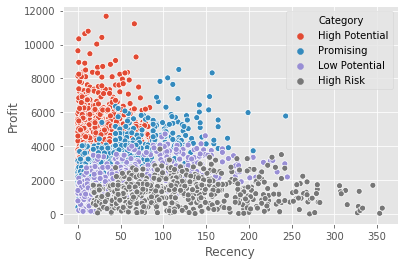

In [68]:
sns.scatterplot(x='Recency',y='Profit',hue='Category',data=df_cust)
plt.show()

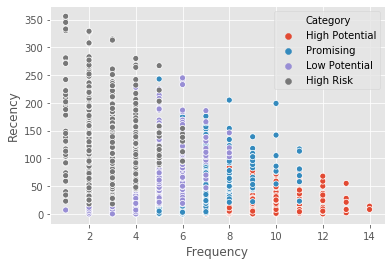

In [69]:
sns.scatterplot(x='Frequency',y='Recency',hue='Category',data=df_cust)
plt.show()

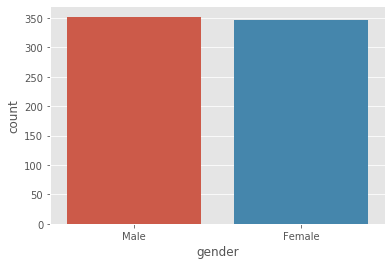

In [72]:
sns.countplot(df_cust[df_cust['Category']=='High Potential']['gender'])
plt.show()

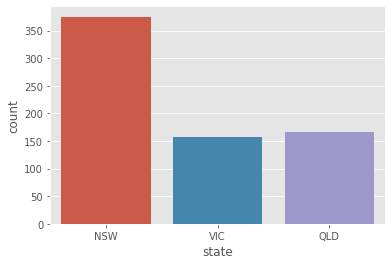

In [74]:
sns.countplot(df_cust[df_cust['Category']=='High Potential']['state'])
plt.show()

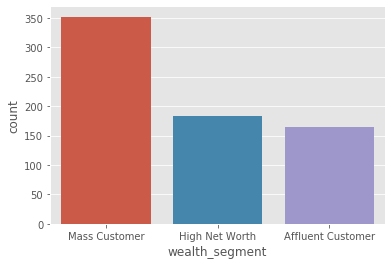

In [75]:
sns.countplot(df_cust[df_cust['Category']=='High Potential']['wealth_segment'])
plt.show()